# Souper-duper predictive model

## Prepare data

In [573]:
import pandas as pd
import numpy as np
import os

In [527]:
path = os.path.join('data', 'souper_with_events.csv')
soup = pd.read_csv(path, index_col = 0)
soup.head()

,date,locA,locB,total,month,day_of_week,day_of_month,season,event
0,2018-02-03,30,15,45,February,Saturday,3,Winter,0
1,2018-02-05,30,17,47,February,Monday,5,Winter,0
2,2018-02-24,25,9,34,February,Saturday,24,Winter,0
3,2018-03-03,30,15,45,March,Saturday,3,Spring,0
4,2018-03-05,30,12,42,March,Monday,5,Spring,0


In [528]:
path = os.path.join('data', 'weather_data_complete.csv')
weather = pd.read_csv(path)
weather.head()

,day,month,year,precip_intensity_max,precip_intensity_avg,precip_type,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity
0,3,2,2018,0.1336,0.0190,rain,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83
1,4,2,2018,0.0129,0.0005,rain,7.07,7.05,11.88,7.28,-3.10,-0.07,-1.50,-0.20,-3.27,0.76
2,5,2,2018,0.0000,0.0000,no_precip,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74
3,6,2,2018,0.0000,0.0000,no_precip,5.84,5.86,6.98,5.88,-5.55,-2.78,-4.15,-2.78,-5.11,0.74
4,7,2,2018,0.0000,0.0000,no_precip,3.62,3.65,5.26,3.74,-5.11,-0.01,-2.72,-0.01,-2.83,0.68


In [529]:
weather['date'] = weather['year'].astype(str) + '-' + \
                  weather['month'].astype(str).apply(lambda s: f'{s:0>2}') + '-' + \
                  weather['day'].astype(str).apply(lambda s: f'{s:0>2}')
weather = weather.drop(['month'], axis = 1)
weather.loc[:, 'day_of_year'] = weather.loc[:, 'date'].apply(date2dayofyear)
df = weather.merge(soup, on = 'date')
df.head()

,day,year,precip_intensity_max,precip_intensity_avg,precip_type,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,...,date,day_of_year,locA,locB,total,month,day_of_week,day_of_month,season,event
0,3,2018,0.1336,0.019,rain,3.27,3.25,10.24,4.03,0.18,...,2018-02-03,34,30,15,45,February,Saturday,3,Winter,0
1,5,2018,0.0000,0.000,no_precip,7.72,7.74,9.97,7.84,-4.58,...,2018-02-05,36,30,17,47,February,Monday,5,Winter,0
2,24,2018,0.0000,0.000,no_precip,8.92,8.92,12.12,8.92,-9.05,...,2018-02-24,55,25,9,34,February,Saturday,24,Winter,0
3,3,2018,0.1913,0.014,snow,5.05,5.08,11.21,5.79,-7.17,...,2018-03-03,62,30,15,45,March,Saturday,3,Spring,0
4,5,2018,0.0000,0.000,no_precip,4.75,4.76,6.02,4.81,-1.14,...,2018-03-05,64,30,12,42,March,Monday,5,Spring,0


In [530]:
variables = [
    'year',
    'month',
    'day_of_week',
    'day_of_month',
    'day_of_year',
    'season',
    'precip_intensity_max',
    'precip_intensity_avg',
    'wind_speed_max',
    'wind_speed_avg',
    'gust_max',
    'gust_avg',
    'temp_min',
    'temp_max',
    'temp_avg',
    'temp_day',
    'temp_night',
    'humidity',
    'event'
]

In [531]:
X = df[variables]
y = df['total']
X.head()

,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event
0,2018,February,Saturday,3,34,Winter,0.1336,0.019,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0
1,2018,February,Monday,5,36,Winter,0.0000,0.000,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0
2,2018,February,Saturday,24,55,Winter,0.0000,0.000,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0
3,2018,March,Saturday,3,62,Spring,0.1913,0.014,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0
4,2018,March,Monday,5,64,Spring,0.0000,0.000,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0


In [532]:
def day2int(day: str):
    ''' Convert a day to an integer. '''
    days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    days = {day: idx for (idx, day) in enumerate(days)}
    return days.get(day.lower())
    
def month2int(month: str):
    ''' Convert a month to an integer. '''
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 
              'august', 'september', 'october', 'november', 'december']
    months = {month: idx for (idx, month) in enumerate(months)}
    return months.get(month.lower())

def season2int(season: str):
    ''' Convert a season to an integer. '''
    seasons = ['winter', 'spring', 'summer', 'autumn']
    seasons = {season: idx for (idx, season) in enumerate(seasons)}
    return seasons.get(season.lower())

def date2dayofyear(date: str):
    ''' Convert at date of the YYYY-MM-DD format
        to the day of the year. '''
    from calendar import monthrange
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:10])
    
    day_of_year = 0
    for m in range(1, month):
        day_of_year += monthrange(year, m)[1]
    day_of_year += day
    
    return day_of_year

In [533]:
day2int('Wednesday'), month2int('december'), season2int('AuTUMN'), date2dayofyear('2019-02-05')

(2, 11, 3, 36)

In [534]:
X.loc[:, 'day_of_week'] = X.loc[:, 'day_of_week'].apply(day2int)
X.loc[:, 'month'] = X.loc[:, 'month'].apply(month2int)
X.loc[:, 'season'] = X.loc[:, 'season'].apply(season2int)
X.head()

/home/leidem/.local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event
0,2018,1,5,3,34,0,0.1336,0.019,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0
1,2018,1,0,5,36,0,0.0000,0.000,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0
2,2018,1,5,24,55,0,0.0000,0.000,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0
3,2018,2,5,3,62,1,0.1913,0.014,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0
4,2018,2,0,5,64,1,0.0000,0.000,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0


## Data analysis

In [535]:
from matplotlib import pyplot as plt

In [536]:
viz = X.copy()
viz['total'] = y
viz.head()

,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event,total
0,2018,1,5,3,34,0,0.1336,0.019,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0,45
1,2018,1,0,5,36,0,0.0000,0.000,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0,47
2,2018,1,5,24,55,0,0.0000,0.000,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0,34
3,2018,2,5,3,62,1,0.1913,0.014,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0,45
4,2018,2,0,5,64,1,0.0000,0.000,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0,42


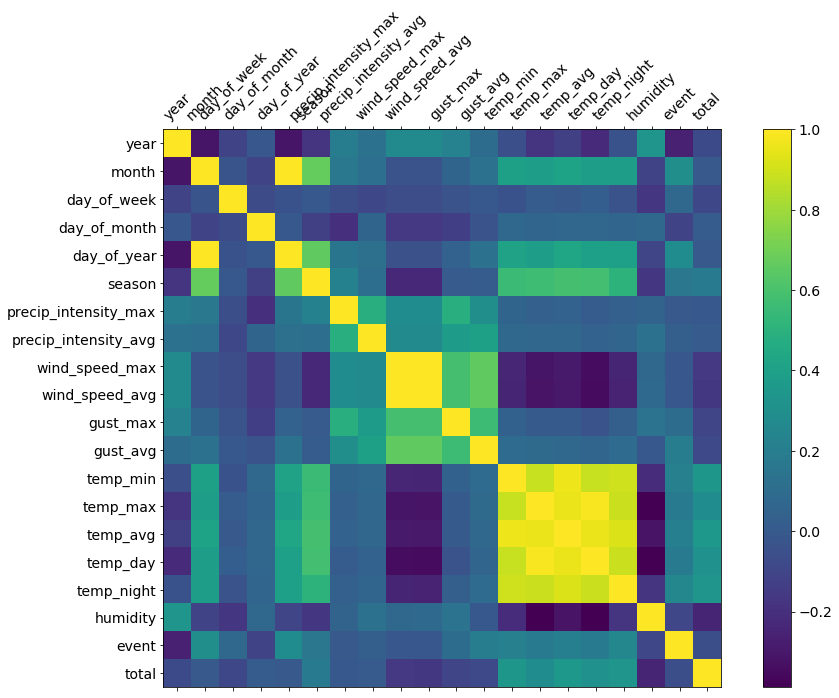

In [537]:
f = plt.figure(figsize=(15, 10))
plt.matshow(viz.corr(), fignum=f.number)
plt.xticks(range(viz.shape[1]), viz.columns, fontsize=14, rotation=45)
plt.yticks(range(viz.shape[1]), viz.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

## Model selection

In [538]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, svm, ensemble

### Linear regression

In [539]:
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [540]:
scores = cross_val_score(linreg, X, y, cv = 10)
-np.mean(scores)

1.786862450846409

### Ridge regression

In [541]:
ridge = linear_model.Ridge(alpha = 0.2)
ridge.fit(X, y)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [542]:
scores = cross_val_score(ridge, X, y, cv = 10)
-np.mean(scores)

1.6052377000245375

### Support vector machine

In [543]:
sv = svm.SVR(C = 1.0, gamma = 'scale')
sv.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [544]:
scores = cross_val_score(sv, X, y, cv = 10)
-np.mean(scores)

0.7906019033431058

### Random forest

In [545]:
forest = ensemble.RandomForestRegressor(n_estimators = 20)
forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [546]:
scores = cross_val_score(forest, X, y, cv = 10)
-np.mean(scores)

0.3999819207484515

In [547]:
list(zip(X.columns, forest.feature_importances_))

[('year', 0.0030740910080043382),
 ('month', 0.008556044059672217),
 ('day_of_week', 0.06471787805842454),
 ('day_of_month', 0.054696106500403706),
 ('day_of_year', 0.20021027000326877),
 ('season', 0.04169822373696709),
 ('precip_intensity_max', 0.027728024993967242),
 ('precip_intensity_avg', 0.038841225075309),
 ('wind_speed_max', 0.011985528180269754),
 ('wind_speed_avg', 0.01681228820502189),
 ('gust_max', 0.04545299360093689),
 ('gust_avg', 0.06344698897220055),
 ('temp_min', 0.1420358906469203),
 ('temp_max', 0.035085511714504386),
 ('temp_avg', 0.06278663250234254),
 ('temp_day', 0.06585316450476697),
 ('temp_night', 0.051245558716253595),
 ('humidity', 0.058094971597417985),
 ('event', 0.0076786079233481935)]

In [548]:
yhat = forest.predict(X)

## Results

In [552]:
from matplotlib import pyplot as plt

In [549]:
ml_viz = viz.copy()
ml_viz['date'] = ml_viz['year'].astype(str) + '-' + \
                 ml_viz['month'].astype(str).apply(lambda s: f'{s:0>2}') + '-' + \
                 ml_viz['day_of_month'].astype(str).apply(lambda s: f'{s:0>2}')
ml_viz.head()

,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,...,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event,total,date
0,2018,1,5,3,34,0,0.1336,0.019,3.27,3.25,...,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0,45,2018-01-03
1,2018,1,0,5,36,0,0.0000,0.000,7.72,7.74,...,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0,47,2018-01-05
2,2018,1,5,24,55,0,0.0000,0.000,8.92,8.92,...,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0,34,2018-01-24
3,2018,2,5,3,62,1,0.1913,0.014,5.05,5.08,...,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0,45,2018-02-03
4,2018,2,0,5,64,1,0.0000,0.000,4.75,4.76,...,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0,42,2018-02-05


In [560]:
train_idx = (ml_viz['year'] == 2018) | (ml_viz['month'] < 4) | \
               ((ml_viz['month'] == 4) & (ml_viz['day_of_month'] <= 20))
train, test = ml_viz[train_idx], ml_viz[~train_idx]
#train = train[['date', 'total']]
train.head()

,year,month,day_of_week,day_of_month,day_of_year,season,precip_intensity_max,precip_intensity_avg,wind_speed_max,wind_speed_avg,...,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,event,total,date
0,2018,1,5,3,34,0,0.1336,0.019,3.27,3.25,...,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,0,45,2018-01-03
1,2018,1,0,5,36,0,0.0000,0.000,7.72,7.74,...,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,0,47,2018-01-05
2,2018,1,5,24,55,0,0.0000,0.000,8.92,8.92,...,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,0,34,2018-01-24
3,2018,2,5,3,62,1,0.1913,0.014,5.05,5.08,...,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,0,45,2018-02-03
4,2018,2,0,5,64,1,0.0000,0.000,4.75,4.76,...,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,0,42,2018-02-05


In [561]:
forest.fit(train[variables], train['total'])
preds = test.copy()[variables]
preds['total'] = [forest.predict([preds.iloc[idx, :]])[0] for idx in range(len(preds))]
preds['date'] = preds['year'].astype(str) + '-' + \
                preds['month'].astype(str).apply(lambda s: f'{s:0>2}') + '-' + \
                preds['day_of_month'].astype(str).apply(lambda s: f'{s:0>2}')
preds = preds[['date', 'total']]
preds.head()

,date,total
115,2019-04-25,59.70
116,2019-04-27,60.40
117,2019-04-31,52.55
118,2019-05-09,54.75
119,2019-05-12,61.50


In [562]:
test = test[['date', 'total']]
test.head()

,date,total
115,2019-04-25,70
116,2019-04-27,65
117,2019-04-31,55
118,2019-05-09,70
119,2019-05-12,50


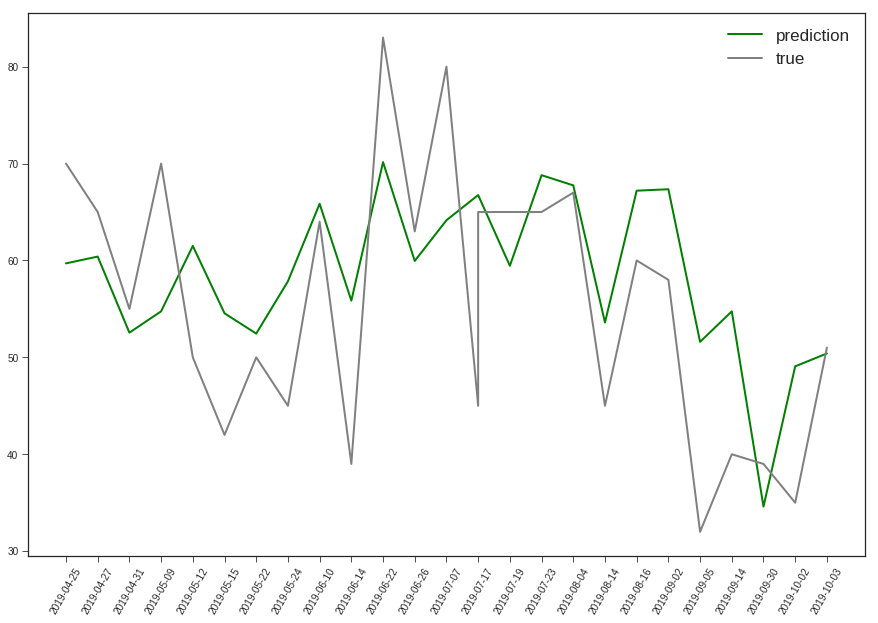

In [602]:
plt.style.use('seaborn-ticks')
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(preds['date'], preds['total'], label = 'prediction', color = 'green', linewidth = 2)
plt.plot(test['date'], test['total'], label = 'true', color = 'grey', linewidth = 2)
plt.legend(fontsize = 17)
plt.xticks(rotation =  60)
plt.show()

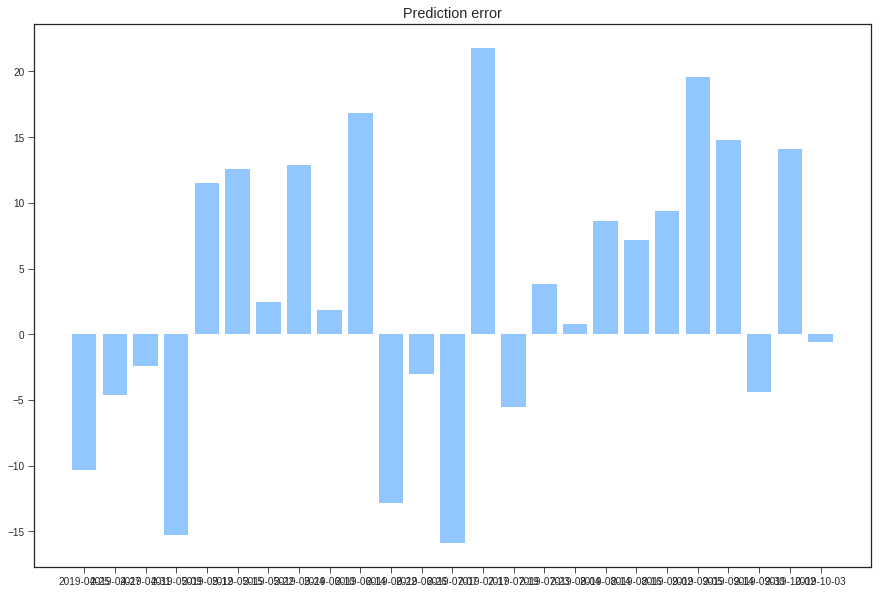

In [586]:
plt.style.use('seaborn-ticks')
fig, ax = plt.subplots(figsize = (15, 10))
plt.bar(preds['date'], preds['total'] - test['total'])
plt.title('Prediction error')
plt.show()

In [601]:
np.mean(np.abs(preds['total'] - test['total']))

9.022115384615386